# SZU 计算机图形学复习


任务目标：

- 输入：**顶点** 和 **状态变量**；即几何对象、属性，相机参数

- 输出：位于帧缓存的彩色像素阵列

OpenGL的渲染管线：

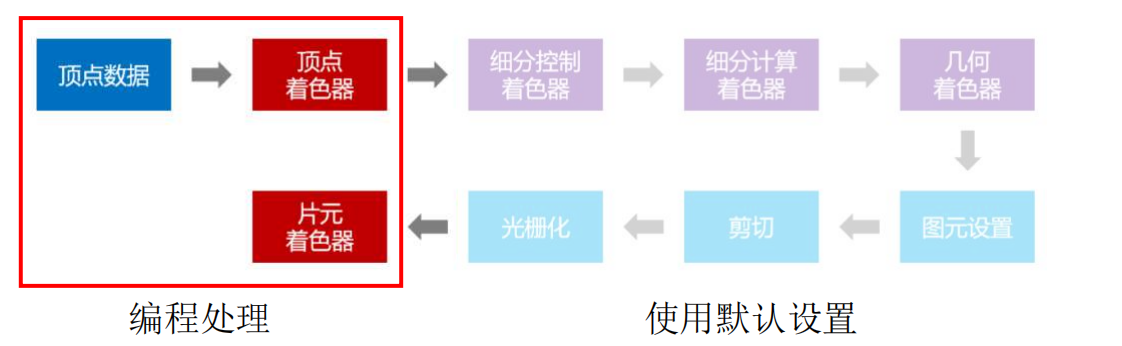


图形绘制系统的4个主要任务：**建模**、**几何处理**、**光栅化**、**片元处理**

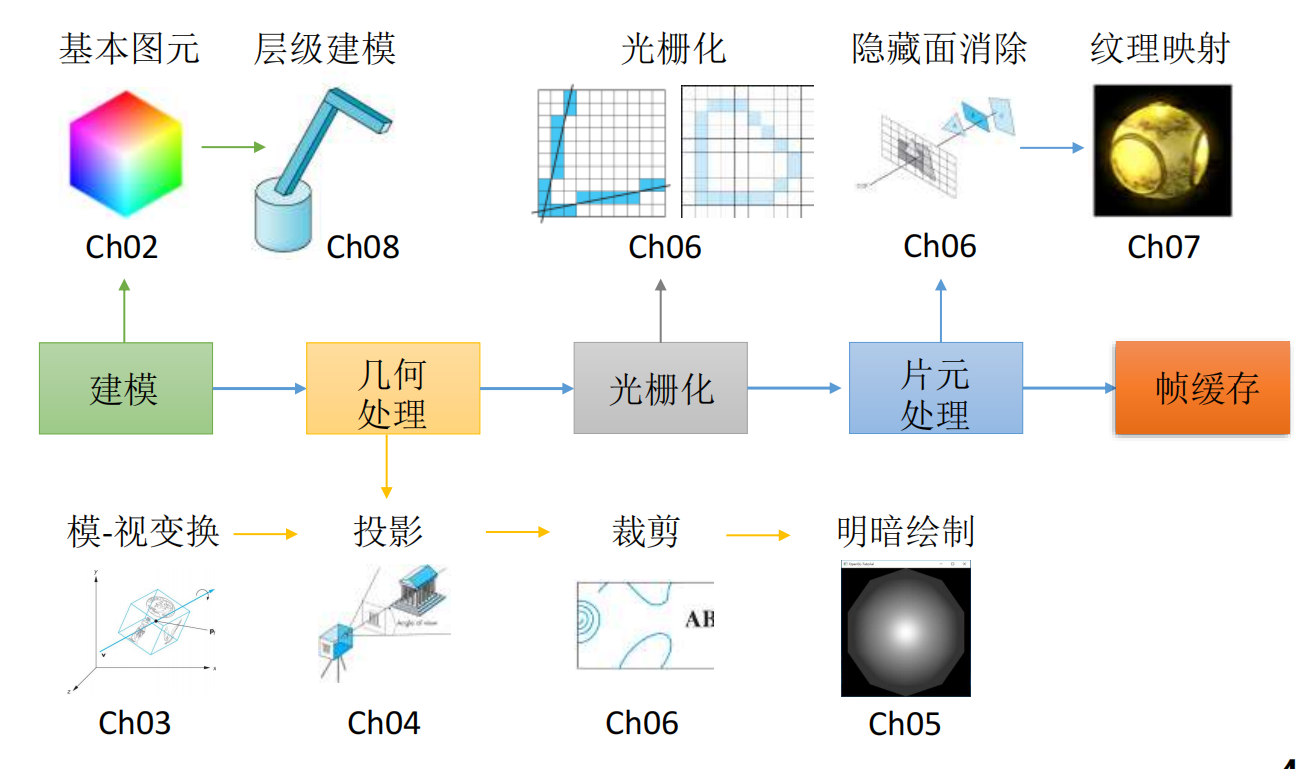

## 第一章：模-视 变换（★★★）

- 两种变换的区别：

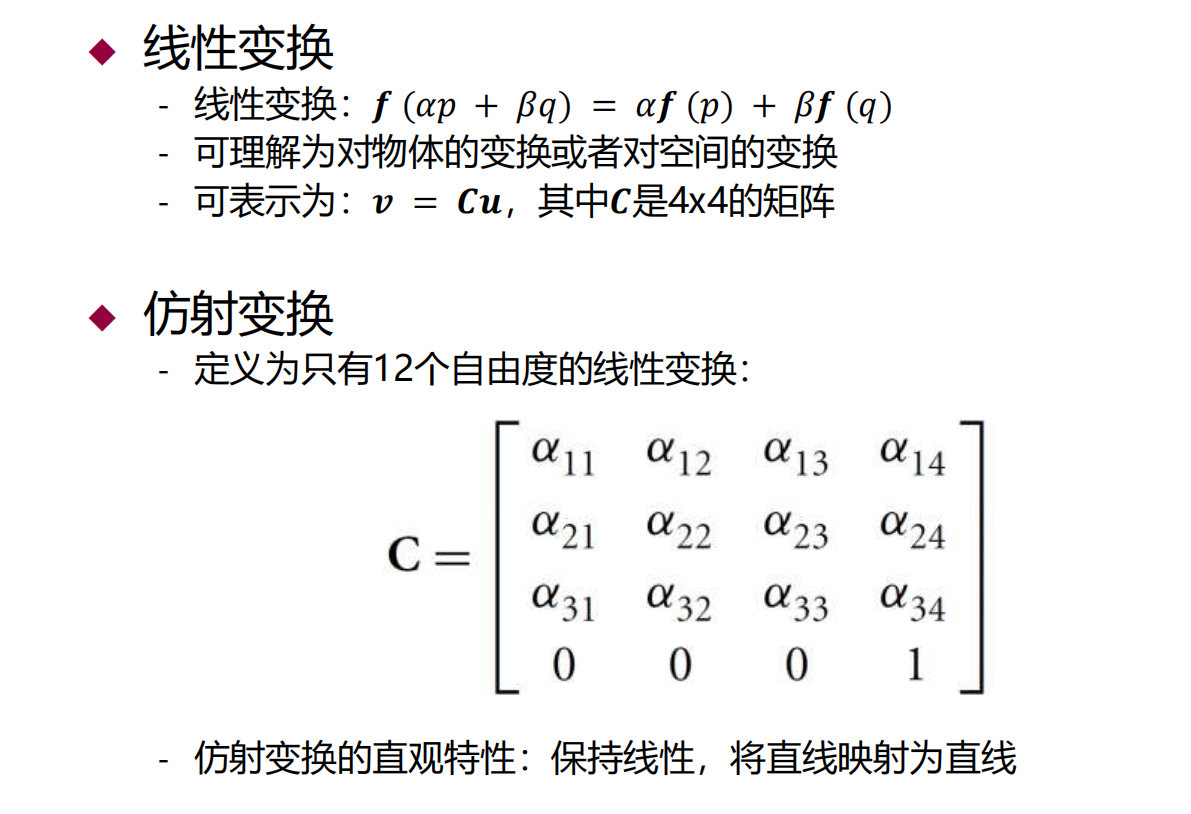

- 固定管线的六个标准架构：模型坐标系、世界坐标系、相机坐标系 $(u,v,n)$；裁剪坐标系，规范化的设备坐标系、屏幕坐标系

    - 坐标系采用 **齐次坐标** 表示（0：向量；1：顶点）

    - 变换使用 **仿射变换矩阵** 实现

- LookAt 函数：eye-视点，at-参考点，up-上方向量

    - **视图矩阵**（$u=v×n$；右手定则），
    
    - 设位置 $p$：$[x,y,z,1]$, at和up：$M^T=[u,v,n,p]$,则视图矩阵为：
    
    $$(M^T)^{-1} \begin{bmatrix} u_x & u_y & u_z & -u·p \\ v_x & v_y & v_z & -v·p \\ n_x & n_y & n_z & -n·p \\ 0 & 0 & 0 & 1 \end{bmatrix} $$

    


- 坐标系变换：$a$ 和 $b$ 是空间的两组基，且 $a=M^T b$
    
    - 设 $u$, $v$ 满足 $av^T=bu^T$，则有方程组：$$
\begin{cases}
u_1 = \gamma_{11}v_1 + \gamma_{12}v_2 + \gamma_{13}v_3\\
u_2 = \gamma_{21}v_1 + \gamma_{22}v_2 + \gamma_{23}v_3\\
u_3 = \gamma_{31}v_1 + \gamma_{32}v_2 + \gamma_{33}v_3\\
Q_0 = \gamma_{41}v_1 + \gamma_{42}v_2 + \gamma_{43}v_3 + P_0
\end{cases}$$
    
    - 其次坐标系变换矩阵为：$$
M = \begin{bmatrix}
\gamma_{11} & \gamma_{12} & \gamma_{13} & 0\\
\gamma_{21} & \gamma_{22} & \gamma_{23} & 0\\
\gamma_{31} & \gamma_{32} & \gamma_{33} & 0\\
\gamma_{41} & \gamma_{42} & \gamma_{43} & 1
\end{bmatrix}$$

- **平移变换**：设平移的方向向量为 $[d_x,d_y,d_z]$，则平移变换矩阵为：
$$
T = T(d_x,d_y,d_z) = \begin{bmatrix}
1 & 0 & 0 & d_x\\
0 & 1 & 0 & d_y\\
0 & 0 & 1 & d_z\\
0 & 0 & 0 & 1
\end{bmatrix}$$

- **缩放变换**：设缩放的比例为 $[s_x,s_y,s_z]$，则缩放变换矩阵为：
$$
S = S(s_x,s_y,s_z) = \begin{bmatrix}
s_x & 0 & 0 & 0\\
0 & s_y & 0 & 0\\
0 & 0 & s_z & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$$

- **旋转变换**：设旋转的角度为 $\theta$，分别绕 $x$、$y$、$z$ 轴旋转，则旋转变换矩阵为：

    - 推导方法：转化为极坐标 ($x = r \cosα, y = r \sinα$)，用三角函数表示 $x = r \cos(\alpha+\theta)$ 和 $y = r \sin (\alpha+\theta)$，结合右手定则


    - 绕 $x$ 轴旋转：$$
R_x = R_x(\theta) = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & \cos\theta & -\sin\theta & 0\\
0 & \sin\theta & \cos\theta & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$$
    
    - 绕 $y$ 轴旋转：$$
R_y = R_y(\theta) = \begin{bmatrix}
\cos\theta & 0 & \sin\theta & 0\\
0 & 1 & 0 & 0\\
-\sin\theta & 0 & \cos\theta & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$$
    
    - 绕 $z$ 轴旋转：$$
R_z = R_z(\theta) = \begin{bmatrix}
\cos\theta & -\sin\theta & 0 & 0\\
\sin\theta & \cos\theta & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$$


- 变换的级联：变换顺序是 A, B, C，则变换矩阵为 $CBA$，即先进行 C 变换，再进行 B 变换，最后进行 A 变换, 即 $$M=CBA, \quad q = M p$$


## 第二章：投影变换（★★★）

- 构建视图的核心机制：**仿射变化**（平移、旋转、缩放）、**投影规范化**


- OpenGL实现：
    
    - 定位照相机：设置 模-视 矩阵
    - 设置镜头：设置 投影矩阵，规范化视景体
    - 裁剪：裁剪规范视见体之外的图元

- 规范的视见体：

    - 视线范围：$x=±1,\ y=±1,\ z=±1$
    - 中心：原点
    - 视线方向：$-z$ 轴

- OPenGL的正交投影：

    - 用 Ortho(left, right, bottom, top, near, far) 指定


- OPenGL的透视投影：

    - 用 Frustum(left, right, bottom, top, near, far) 指定
    
    - 用 Perspective(fovy, aspect, near, far) 指定
        - fovy：视角；aspect：宽高比；near：近裁剪面；far：远裁剪面

- **正交投影**：以 $z=0$ 为投影平面，投影矩阵为：$$
P = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}$$

- 规范化（对于长方体视见体）：① 把中心移到原点；② 缩放到规范视见体，让边长为2；③ 注意z的反向

    - 中心移动到原点 $$T(-\frac{r+l}{2}, -\frac{t+b}{2}, -\frac{n+f}{2})$$

    - 缩放到规范视见体 $$S(\frac{2}{r-l}, \frac{2}{t-b}, -(\frac{2}{f-n}))$$

    - 注意z的反向 $$v_S(1, 1, -1)$$

    - 综合变换 $$P = ST$$，即 $$P = \begin{bmatrix}
\frac{2}{r-l} & 0 & 0 & -\frac{r+l}{r-l}\\
0 & \frac{2}{t-b} & 0 & -\frac{t+b}{t-b}\\
0 & 0 & -(\frac{2}{f-n}) & -\frac{f+n}{f-n}\\
0 & 0 & 0 & 1
\end{bmatrix}$$


- 透视除法：若 $P$：$(x,y,z,w)$，$w$ 不为 0，则透视除法后坐标变为：$$(x/w,y/w,z/w,1)$$

- **透视投影**：以原点为中心，将原视图投影到沿 $z$ 轴为 $d$ 的坐标位置，则投影矩阵为：$$
P = \begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 1/d & 0
\end{bmatrix}$$然后做透视除法

- 规范化步骤：

    - **错切变换**：把不对称棱台变换为对称棱台，且对称平面过原点
        $$ H(\theta,\phi) = H(\cot^{-1}(\frac{left + right}{2·near}), \cot^{-1}(\frac{top + bottom}{2·near}))$$

        - 其中,H是错切变换矩阵，$\theta$和$\phi$是错切角度，展开式为
        $$ H = \begin{bmatrix}
        1 & 0 & 0 & 0\\
        0 & 1 & 0 & 0\\
        \tan\theta & \tan\phi & 1 & 0\\
        0 & 0 & 0 & 1
        \end{bmatrix}$$

    - **放缩变换**：把棱台的侧面变成 $x = ±z, y = ±z$
    $$S = \begin{bmatrix}
    \frac{2·near}{right-left} & 0 & 0 & 0\\
    0 & \frac{2·near}{top-bottom} & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & 0 & 0 & 1
    \end{bmatrix}$$

    - **透视归一化**：把棱台的底面变成单位正方形$$N = \begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & \alpha & \beta \\
    0 & 0 & -1 & 0
    \end{bmatrix}$$
        - 其中，$\alpha = - \frac{far+near}{far-near}$，$\beta = \frac{-2·far·near}{far-near}$

    - 综合变换：$P = N·S·H$，$$ P = \begin{bmatrix}
    \frac{2·near}{right-left} & 0 & \frac{right+left}{right-left} & 0\\
    0 & \frac{2·near}{top-bottom} & \frac{top+bottom}{top-bottom} & 0\\
    0 & 0 & -\frac{far+near}{far-near} & \frac{-2·far·near}{far-near}\\
    0 & 0 & -1 & 0
    \end{bmatrix}$$
    

## 第三章：光照模型（★★★）

- 对于是三个通道 (r, g, b) 的颜色，光强遵从加法

    - 设自然光$a$、漫反射$d$、镜面$s$

    - 而 $L$,$R$ 分别取决于 光源 和 物体的反射特性，有：$$I = I_a + I_d + I_s = L_a·R_a + L_d·R_d + L_s·R_s$$

- **Phong 模型**：总光强 = 自然光光强 + 漫反射光强 + 镜面反射光强

    $$ I = k_aL_a + 
    \frac{1}{a+bd+cd^2}(k_dL_d\max(l·n,0) + k_sL_s\max(r·v,0)^\alpha)
    $$
    - 自然光：$$I_a = k_aL_a$$
        - $k_a$：环境光反射系数；
        - $L_a$：环境光强度
    
    - 漫反射：$$I_d = \frac{1}{a+bd+cd^2}(k_dL_d\max(l·n,0))$$
        - $k_d$：漫反射系数；
        - $L_d$：漫反射光强度；
        - $l$：光线方向；
        - $n$：法向量；
        - $d$：$l$ 和 $n$ 的夹角余弦值

    - 镜面反射：$$I_s = \frac{1}{a+bd+cd^2}(k_sL_s\max(r·v,0)^\alpha)$$
        - $k_s$：镜面反射系数；
        - $L_s$：镜面反射光强度；
        - $r$：反射光线方向；
        - $v$：视线方向；
        - $\alpha$：反射光线和视线夹角

- **Blinn-Phong 模型**：$$I = k_aL_a + \frac{1}{a+bd+cd^2}(k_dL_d\max(l·n,0) + k_sL_s\max(h·n,0)^\beta)$$
    - **改进点**：利用 *半程向量*，计算公式为：$h = \frac{l+v}{|l+v|} $，提高计算效率（计算反射光线方向是较为复杂的）

    - **优点**：

        1. 计算简单提高计算效率
        2. 具有更好的光照效果（平面同侧时，夹角不会像Phong模型那样超过90度而出现断层）

- **着色方式**：

    - **均匀着色**：每个片面根据平面法向计算一个颜色

    - **Gouraud 着色**：每个顶点用其所有邻面的法向量平均值作为顶点法向，用于计算顶点颜色，然后用顶点颜色进行光栅插值得到片面颜色；

        - 顶点颜色计算：取顶点所有邻面的法向量的平均值作为该点法向$$n = \frac{n_1+n_2+n_3}{|n_1+n_2+n_3|}$$
        

        - 用顶点着色器实现

    - **Phong 着色**：先计算顶点的法向，然后对于片面上的点用该面顶点构成的法向插值得到片面中任意点的法向，再根据片面法向计算颜色

        - 法向插值实现：首先对法向进行插值，然后再进行归一化:$$n = \frac{1}{\sqrt{a^2+b^2+c^2}}(an_x+bn_y+cn_z)$$

        - 用片元着色器实现

    - 降低 Mach 效应：Phong > Gouraud > 均匀

        - Mach效应：光照效果的不连续性，色块断层明显的现象

- **阴影**：根据透视投影推导;

    - 设光源位置$(x_l,y_l,z_l)$，投影到平面 $ y = 0 $ 为例，$$
    \begin{cases}
    x_p = x_l - \frac{x-x_l}{y - y_l}y_l\\
    y_p = 0\\
    z_p = z_l - \frac{z-z_l}{y - y_l}y_l
    \end{cases}$$投影矩阵为：$$M=
    \begin{bmatrix}
    -y_l & x_l & 0 & 0\\
    0 & 0 & 0 & 0\\
    0 & z_l & -y_l & 0\\
    0 & 1 & 0 & -y_l
    \end{bmatrix}$$
    
    - 步骤：$M = T_2·P·T_1$

        - 平移到原点：$$T_1(-x_l, -y_l, -z_l)$$

        - 投影到平面 $y=-y_l$ ：$$    
    P = \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & 1 & 0\\
    0 & -1/y_l & 0 & 0 
    \end{bmatrix}$$然后做透视除法
        
        - 平移回原位置：$$T_2(x_l, y_l, z_l)$$

## 第四章：裁剪

- **裁剪方法**：直接法、Cohen-Sutherland 法 (2D/3D)、Liang-Barsky (2D/3D) 法

    - **直接法**：直接计算线段与裁剪窗口的交点，然后裁剪

    - **Cohen-Sutherland法**：以2D为例，对端点编码，判断端点是否在裁剪窗口内，*可以推广到3D*

        - 编码规则：上下右左分别为 1000, 0100, 0010, 0001；八个方向

        - 情况判断：

            - case 1：两个端点都在四条直线内；
                - 保留
            
            - case 3：一个在内部，一个在外部；
                - 计算交点，裁剪部分
            
            - case 2：两个端点都在四条直线外，且在同一侧；
                - 舍弃
            
            - case 4：两个端点都在四条直线外，且在不同侧；
                - 计算交点，裁剪部分


    - **Liang-Barsky法**：根据 **线段** 的参数方程$$-p(\alpha)=(1-\alpha)p_1+\alpha p_2, \quad 0\leq \alpha \leq 1$$计算出所在直线与各边交点的参数$\alpha$，然后通过顺序区分：

        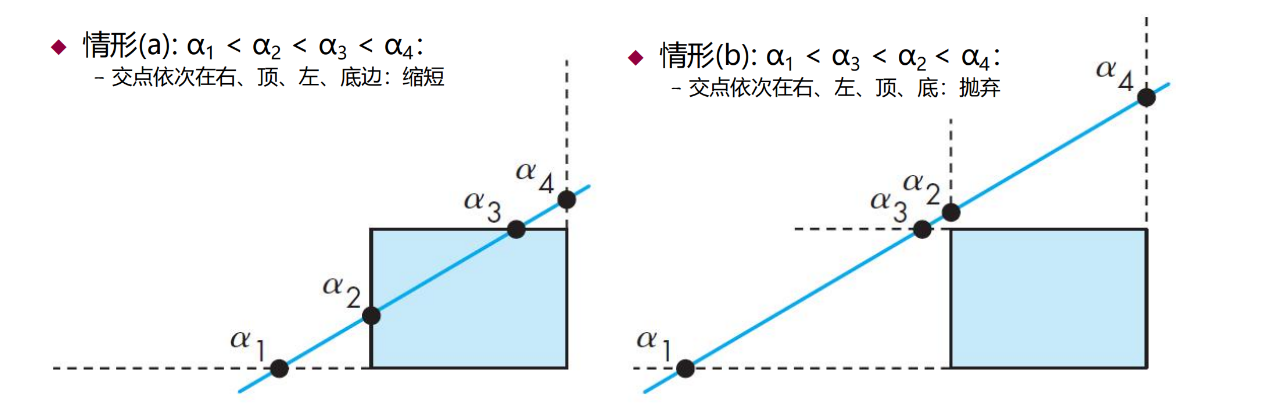

    - **方法对比**：
        
        - Cohen-Sutherland 法在 线段需要多步进行缩短（裁剪）时，代码要重复执行，效率不高；
        
        - Liang-Barsky 法使用 $\alpha$ 参数方程，没必要像前者那样重复应用代码，效率更高

        - 二者都可以推广到3D

## 第五章：光栅化

- **光线追踪**：通过追踪光线在场景中的传播路径，计算光线的反射、折射、阴影以及与物体表面的交互，从而生成具有真实光影效果的图像。

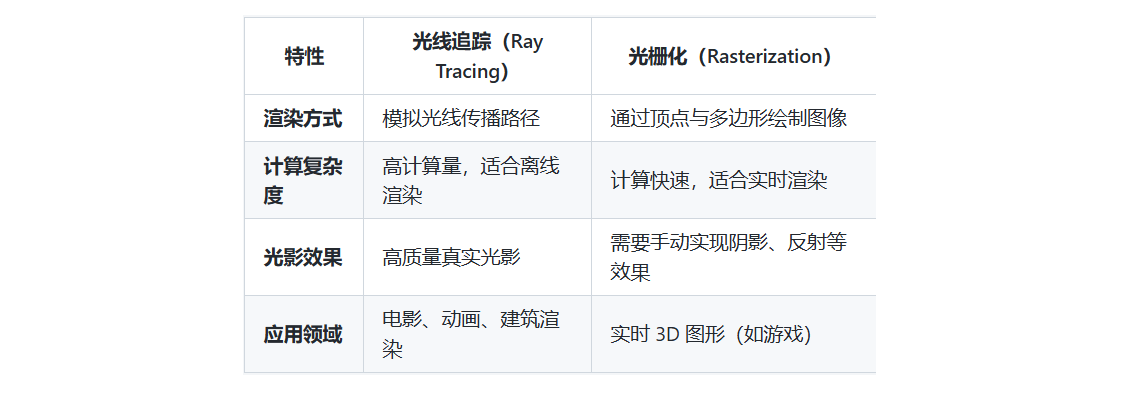

- **直线光栅化**：将直线转化为像素点的过程

    - **DDA算法**：基于微分方程的直线扫描转换算法

        - **基本思想**：对直线的两个端点进行扫描转换，然后根据斜率进行逐点扫描

        - **算法步骤**：

            - 计算斜率：$k = \frac{y_2-y_1}{x_2-x_1}$

            - 逐点扫描：在 $k$ 小于等于1时，有$$
            \begin{cases}
            x_{i+1} = x_i + 1\\
            y_{i+1} = y_i + k
            \end{cases}$$然后赋值$$(x_{i+1},\text{round}(y_{i+1}))$$对于 $k>1$ 的情况，交换 $x$ 和 $y$ 的计算顺序

    - **Bresenham算法**：基于DDA算法的改进，DDA每一步需要一次浮点加法，改进后可以不出现任何浮点运算，在只考虑 $0＜k≤1$ 的情况下（反之用对称性）

        - 假设：像素中心在半整数处
        
        - 从一个已经被确定激活的像素出发，下一个位置只有两种可能：

            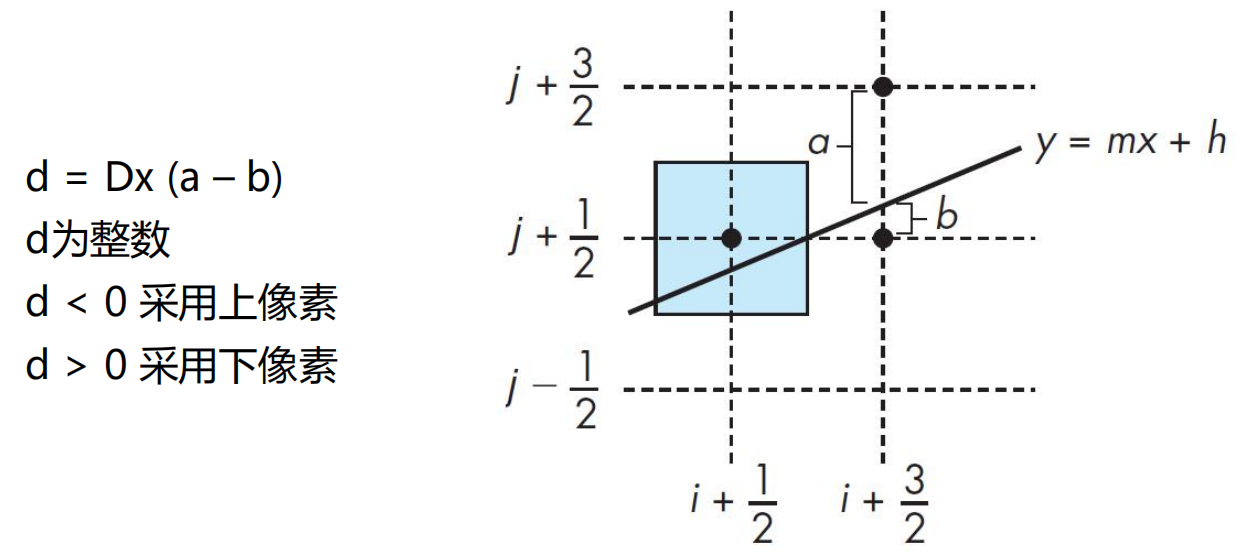

- **内外检测**：测试点在多边形内部还是外部（注意 **顶点处是特例** ）

    - **奇偶测试**：从测定点 $P$ 引一条射线，根据交点个数，
        - 若为奇数，则在内部
        - 若为偶数，则在外部

    - **环绕测试**：设测定点 $P$ 为中心，沿顺/逆时针方向绕多边形边界一圈
        - 若角度和为 $±2\pi$，则在内部
        - 若角度和为 $0$，则在外部

- **填充多边形**：

    - **漫水填充**：在对多边形的边界光栅化后，先确定 **内部** 的一个点（种子点），然后进行递归填充
    ```python
        flood_fill(x, y)
            if (x, y) not in boundary and (x, y) not in filled:
                set_pixel(x, y)
                flood_fill(x+1, y)
                flood_fill(x-1, y)
                flood_fill(x, y+1)
                flood_fill(x, y-1)
    ```

    - **扫描线填充**：维持一个特别的数据结构，结构中保存扫描线与多边形的交点，把多边形内部转化为要填充的颜色即可；
        
        - 按扫描线进行排序
        
        - 逐扫描线跨距进行填充

        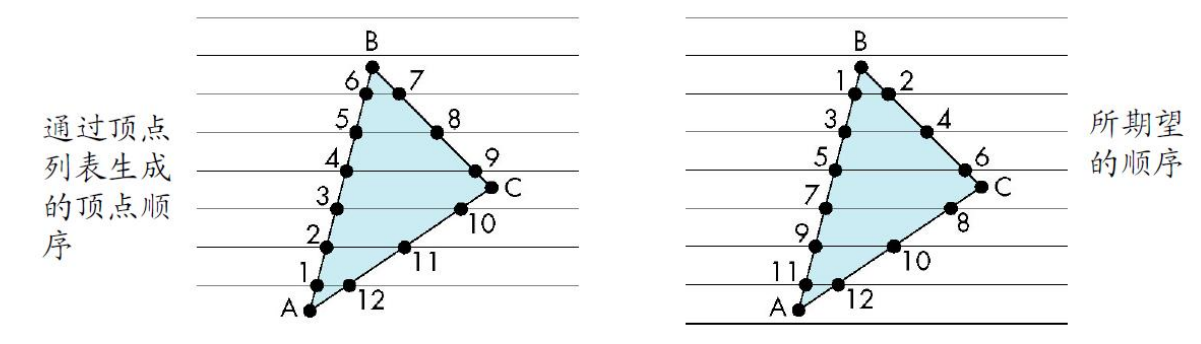

## 第六章：隐藏面消除

- **隐藏面消除**：剔除被遮挡的多边形

    - **画家算法**：对多边形进行排序，先显示远处的多边形，再显示近处的多边形

    - **深度缓冲法**：对每个像素点，记录其深度值，然后比较深度值，保留最小值

        - **深度排序**：对多边形的 $z$ 属性进行排序，然后按顺序绘制

    - **背面剔除**：
        - 面是可见的，如果$-90°<\theta<90°$，等价于$v·n≥0$
        - 平面方程只需要检测 $c$ 的符号
        - OpenGL 的激活背面剔除的功能对于 **非凸对象** 不一定准确

    - **图像空间算法**：对于每条投影线 (共 $nm$ 条)，找到 $k$ 个多边形最近的那个，然后进行深度比较
        - 复杂度 $O(nmk)$
        - 用于光线跟踪

    - **z-缓冲区算法**：在z-缓冲区储存到 **目前为止最近** 对象的深度
        - 处理多边形时，把其深度与缓冲区中的深度进行比较，若其深度更小，更新z-缓冲区

- **反走样**：走样的定义是图像中的锯齿状边缘，反走样就是缓解这种现象

    - **面积平均**：将每个像素划分为多个子区域；检查几何线是否覆盖这些子区域；计算几何图形覆盖子区域的比例，并对颜色进行加权混合。（性能开销高）

    - **FSAA（全屏抗锯齿）**：将场景渲染到一个比屏幕分辨率更高的缓冲区；在完成渲染后，将图像进行降采样（Downsampling）；降采样过程中，将多个“子像素”的颜色值进行平均，生成目标分辨率的像素颜色。（性能开销非常高）

    - **MSAA（多重采样抗锯齿）**：用边缘检测识别图形中需要抗锯齿的区域；对该区域中每个像素的边缘部分使用多个子样本（Sub-Sample）进行采样，而像素内部只计算一次颜色，然后将子样本的颜色值进行加权平均，生成最终的像素颜色。（相对前二者低，平衡了性能和开销）

## 第七章：纹理映射

- 基本策略：扩展到 $(x, y, z, u, v)$，其中 $(u, v)$ 是纹理坐标，步骤为
   
    - 将纹理坐标传送到 **顶点着色器** 中

    - 顶点纹理坐标进行 **光栅化** 的插值计算
    
    - 得到 **片元纹理坐标** 的纹理坐标

- **Mipmapping**：先滤波，降低分辨率，减少插值误差（对于较小对象的纹理映射）

    - **纹理金字塔**：将纹理图像的不同分辨率的图像组织在一起，在Mipmapping时需要确定渲染像素所需要的金字塔层级。

- **滤波 / 放大**：

    - **最近邻插值**：取最近的纹理像素值

    - **双线性插值**：先算$x$的插值，在用来算$y$的插值

    - **三次样条插值**：通过三次多项式函数来逼近已知数据点之间的曲线。可以保证光滑性，但是计算开销大

- 其他映射方法：

    - **环境映射**：根据光线的反射方向，在预先生成的环境纹理中查找对应的像素值（颜色值），然后生成对应颜色，并将其映射到物体表面。

    - **凹凸映射**：凹凸贴图是一张灰度图像，其中每个像素的灰度值表示表面细节的“高度”信息；灰度值范围从黑色（低凹陷）到白色（高凸起），根据凹凸贴图上的高度值，计算表面法线的扰动，或使用高度值的梯度来生成扰动法线。

## 第八章：层级建模

- **图符**：绘制层级模型的基本图元

- **实例变换**：通过**几何变换**把图符从**建模标架**变换到**世界标架**，得到一个**示例**

- 变换的基本形式：平移($T$)、旋转($R$)、缩放($S$)$$M(\{T\},\{R\},\{S\})$$

- 关联模型：把部件关联到一起，可以通过关节角来控制旋转角度

- **练习**：用 rotateX() 、 rotateY() 、 rotateZ() 、 translate() 、 scale() 写汽车 个轮胎的 model 矩阵的伪代码

In [ ]:
// 汽车的模型矩阵
ModelMatrix_Auto = IdentityMatrix();         // 初始为单位矩阵
ModelMatrix_Auto *= translate(carPosition);  // 平移汽车到指定位置
ModelMatrix_Auto *= rotateY(carRotationY);   // 绕 Y 轴旋转（汽车方向）
ModelMatrix_Auto *= scale(carScale);         // 缩放汽车模型

// 单个轮胎的模型矩阵
ModelMatrix_Tire = IdentityMatrix();          // 初始为单位矩阵
ModelMatrix_Tire *= translate(carPosition);   // 平移到汽车的位置
ModelMatrix_Tire *= rotateY(carRotationY);    // 汽车的整体旋转，应用到轮胎
ModelMatrix_Tire *= translate(tireOffset);    // 平移到轮胎相对于汽车的位置
ModelMatrix_Tire *= rotateX(tireRotationX);   // 轮胎绕 X 轴旋转（滚动效果）
ModelMatrix_Tire *= scale(tireScale);         // 缩放轮胎

// 轮胎的相对偏移
Vector3 Tire_Pos_LeftFront  = Vector3(-carWidth / 2, 0, carLength / 2);   // 左前轮
Vector3 Tire_Pos_RightFront = Vector3(carWidth / 2, 0, carLength / 2);    // 右前轮
Vector3 Tire_Pos_LeftRear   = Vector3(-carWidth / 2, 0, -carLength / 2);  // 左后轮
Vector3 Tire_Pos_RightRear  = Vector3(carWidth / 2, 0, -carLength / 2);   // 右后轮

// 左前轮
ModelMatrix_Tire_LeftFront = IdentityMatrix();
ModelMatrix_Tire_LeftFront *= translate(carPosition);   // 汽车的位置
ModelMatrix_Tire_LeftFront *= rotateY(carRotationY);    // 汽车的整体旋转
ModelMatrix_Tire_LeftFront *= translate(Tire_Pos_LeftFront);  // 轮胎的相对位置
ModelMatrix_Tire_LeftFront *= rotateX(tireRotationX);   // 轮胎绕 X 轴旋转（滚动效果）
ModelMatrix_Tire_LeftFront *= scale(tireScale);         // 轮胎的缩放

// 右前轮
ModelMatrix_Tire_RightFront = IdentityMatrix();
ModelMatrix_Tire_RightFront *= translate(carPosition);
ModelMatrix_Tire_RightFront *= rotateY(carRotationY);
ModelMatrix_Tire_RightFront *= translate(Tire_Pos_RightFront);
ModelMatrix_Tire_RightFront *= rotateX(tireRotationX);
ModelMatrix_Tire_RightFront *= scale(tireScale);

// 左后轮
ModelMatrix_Tire_LeftRear = IdentityMatrix();
ModelMatrix_Tire_LeftRear *= translate(carPosition);
ModelMatrix_Tire_LeftRear *= rotateY(carRotationY);
ModelMatrix_Tire_LeftRear *= translate(Tire_Pos_LeftRear);
ModelMatrix_Tire_LeftRear *= rotateX(tireRotationX);
ModelMatrix_Tire_LeftRear *= scale(tireScale);

// 右后轮
ModelMatrix_Tire_RightRear = IdentityMatrix();
ModelMatrix_Tire_RightRear *= translate(carPosition);
ModelMatrix_Tire_RightRear *= rotateY(carRotationY);
ModelMatrix_Tire_RightRear *= translate(Tire_Pos_RightRear);
ModelMatrix_Tire_RightRear *= rotateX(tireRotationX);
ModelMatrix_Tire_RightRear *= scale(tireScale);